# Аналитика в авиакомпании

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('/datasets/query_1.csv')

In [3]:
df1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [4]:
df2 = pd.read_csv('/datasets/query_3.csv')

In [5]:
df2.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


### Вывод

У нас есть две таблицы: в первой - модели самолётов и количество рейсов для каждой модели в сентябре 2018 года. В ней 8 строк и 2 столбца, типы данных корректные; вторая - города и среднее количество рейсов, прибывающих в эти города за день в августе 2018 года. В ней 101 строка и 2 столбца, типы данных тоже корректные. 

## Топ-10 городов по количеству рейсов

In [52]:
df2_top = df2.sort_values('average_flights', ascending = False).head(10)

In [53]:
df2_top['avg_flights'] = df2_top['average_flights'].round()

In [54]:
df2_top.drop('average_flights', axis=1, inplace=True)


In [55]:
df2_top

,city,avg_flights
43,Москва,130.0
70,Санкт-Петербург,31.0
54,Новосибирск,17.0
33,Красноярск,12.0
20,Екатеринбург,11.0
67,Ростов-на-Дону,10.0
63,Пермь,10.0
10,Брянск,10.0
74,Сочи,10.0
84,Ульяновск,10.0


### Вывод

В августе 2018 по среднему количеству рейсов за день лидировала Москва со значительной разницей по сравнению с другими городами в топ-10.

## Графики

In [10]:
model_flights = df1.sort_values('flights_amount')

Text(0, 0.5, 'Модели самолётов')

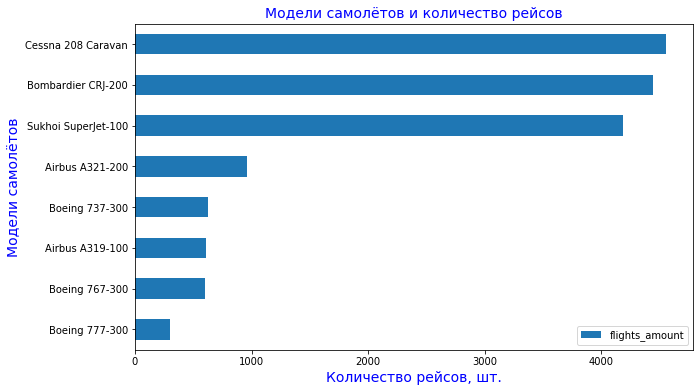

In [32]:
model_flights.plot(kind='barh',
                   x='model', y='flights_amount',
                   figsize=(10,6))
plt.title('Модели самолётов и количество рейсов', fontsize=14, color='blue')
plt.xlabel('Количество рейсов, шт.', fontsize=14, color='blue')
plt.ylabel('Модели самолётов', fontsize=14, color='blue')

В сентябне 2018 года наибольшее количество рейсов авиакомпании «F9» совершились на самолётах моделей - Cessna 208 Caravan, Bombardier CRJ-200, Cessna 208 Caravan. Более 4000 рейсов на каждой из этих моделей. Чуть меньше 1000 рейсов на Airbus A321-200, а наименьшее количество рейсов совершилось на Boeing 777-300 - всего 300 рейсов.

In [12]:
city_flights = df2.sort_values('average_flights')

Text(0, 0.5, 'Среднее количество рейсов за день, шт')

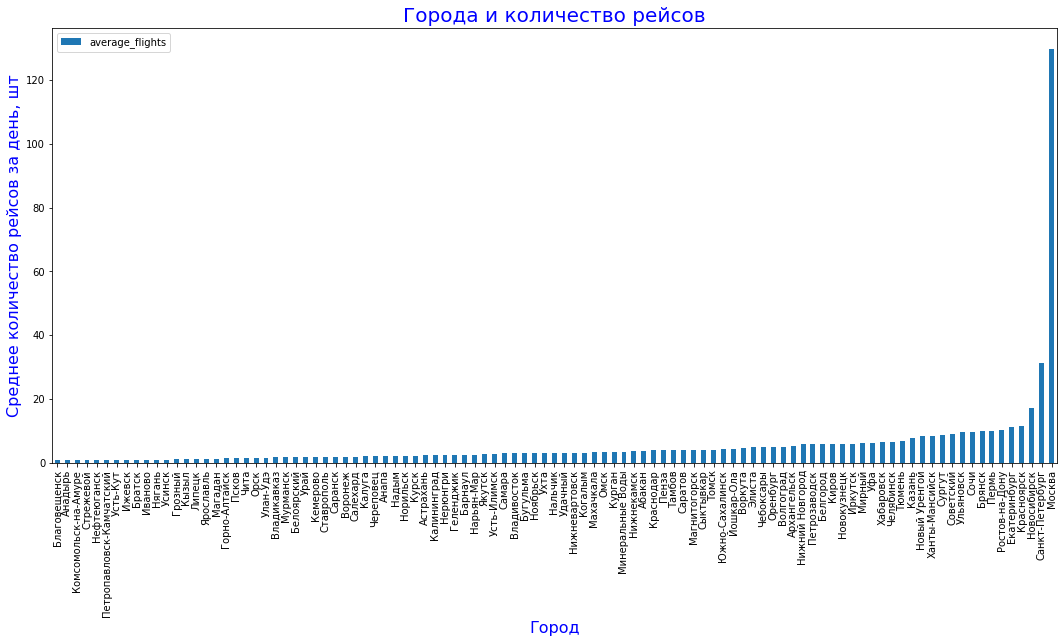

In [40]:
city_flights.plot(kind='bar', x='city', y='avg_flights', 
         title='Города и количество рейсов',
         figsize=(18,8))
plt.title('Города и количество рейсов', fontsize=20, color='blue')
plt.xlabel('Город', fontsize=16, color='blue')
plt.ylabel('Среднее количество рейсов за день, шт', fontsize=16, color='blue')

Для большинства городов среднее количество прибывающих рейсов за день в августе 2018 года от 1 до 20, около 20 рейсов в среднем за день прибывало в Новосибирск. Значительно больше рейсов в среднем за день прибывало в Санкт-Петербуг и Москву: 31 и 129 рейсов соответственно.

Text(0, 0.5, 'Среднее количество рейсов за день, шт')

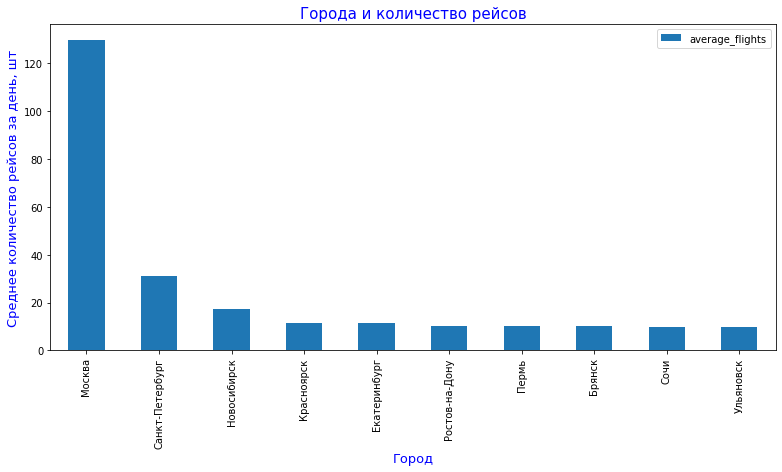

In [45]:
df2_top.plot(kind='bar', x='city', y='average_flights',
         figsize=(13,6))
plt.title('Города и количество рейсов', fontsize=15, color='blue')
plt.xlabel('Город', fontsize=13, color='blue')
plt.ylabel('Среднее количество рейсов за день, шт', fontsize=13, color='blue')

Из графика видно, что по среднему количеству прибывавших рейсов за день лидирует Москва. Далее идут Санкт-Петербург и Новосибирск. В остальные города из топ-10 в среднем за день прибывало около 10 рейсов в августе 2018 года.

### Вывод

В сентябне 2018 года наибольшее количество рейсов авиакомпании «F9» совершились на самолётах моделей - Cessna 208 Caravan, Bombardier CRJ-200, Cessna 208 Caravan. Более 4000 рейсов на каждой из этих моделей.
В августе 2018 года наибольшее среднее количесво рейсов за день прибывало в Москву - 129 рейсов за день в среднем. В Санкт-Петербугр и Новосибирск прибывало значительно меньше рейсов - 31 и 17 рейсов за день соответственно, но это тоже больше, чем в другие города.